# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import cv2
from skimage import io
from glob import glob

In [2]:
df = pd.read_csv("../data/train_df.csv", index_col=0)

In [3]:
df.head()

file  patient_id   lesion_id  gender   age             site  \
0  ISIC_2637011  IP_7279968  IL_7972535    male  45.0        head/neck   
1  ISIC_0015719  IP_3075186  IL_4649854  female  45.0  upper extremity   
2  ISIC_0052212  IP_2842074  IL_9087444  female  50.0  lower extremity   
3  ISIC_0068279  IP_6890425  IL_4255399  female  45.0        head/neck   
4  ISIC_0074268  IP_8723313  IL_6898037  female  55.0  upper extremity   

  diagnosis ben_mal  target               jpg  
0   unknown  benign       0  ISIC_2637011.jpg  
1   unknown  benign       0  ISIC_0015719.jpg  
2     nevus  benign       0  ISIC_0052212.jpg  
3   unknown  benign       0  ISIC_0068279.jpg  
4   unknown  benign       0  ISIC_0074268.jpg

In [27]:
df = df.drop(columns=['jpg'], axis=1)

# Assigning Paths

In [29]:
# === DICOM ===
# Create the paths
path_tr_dcm = '../split/train_dcm/' + df['file'] + '.dcm'
path_tr_jpg = '../split/train/' + df['file'] + '.jpg'

# Append to the original dataframes
df['path_dcm'] = path_tr_dcm
df['path_jpg'] = path_tr_jpg

In [30]:
df.head()

file  patient_id   lesion_id  gender   age             site  \
0  ISIC_2637011  IP_7279968  IL_7972535    male  45.0        head/neck   
1  ISIC_0015719  IP_3075186  IL_4649854  female  45.0  upper extremity   
2  ISIC_0052212  IP_2842074  IL_9087444  female  50.0  lower extremity   
3  ISIC_0068279  IP_6890425  IL_4255399  female  45.0        head/neck   
4  ISIC_0074268  IP_8723313  IL_6898037  female  55.0  upper extremity   

  diagnosis ben_mal  target                             path_dcm  \
0   unknown  benign       0  ../split/train_dcm/ISIC_2637011.dcm   
1   unknown  benign       0  ../split/train_dcm/ISIC_0015719.dcm   
2     nevus  benign       0  ../split/train_dcm/ISIC_0052212.dcm   
3   unknown  benign       0  ../split/train_dcm/ISIC_0068279.dcm   
4   unknown  benign       0  ../split/train_dcm/ISIC_0074268.dcm   

                          path_jpg  
0  ../split/train/ISIC_2637011.jpg  
1  ../split/train/ISIC_0015719.jpg  
2  ../split/train/ISIC_0052212.jpg  
3  ../split/train/ISIC_0068279.jpg  
4  ../split/train/ISIC_0074268.jpg

# Melanoma Images

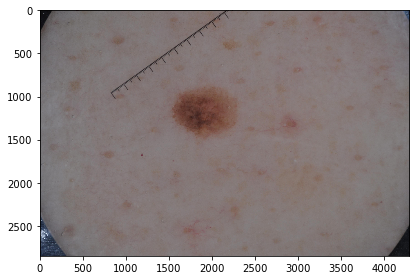

In [24]:
# image_id = df.iloc[25]['file']
paths = glob('../split/train/mel/*.jpg')
image = cv2.imread(paths[2], cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
io.imshow(image)

# path = '../split/train_dcm'
# plt.figure(figsize=(16, 4))
# for k, pth in enumerate(os.path.join(path, df.dcm[:10])):
#     data = pydicom.read_file(pth)
#     image = data.pixel_array
    
#     plt.suptitle('Benign', fontsize=16)
#     plt.subplots(nrows=2, ncols=5, k+1)
#     plt.imshow(image)
#     plt.axis('off')

    

# Non-Melanoma Images

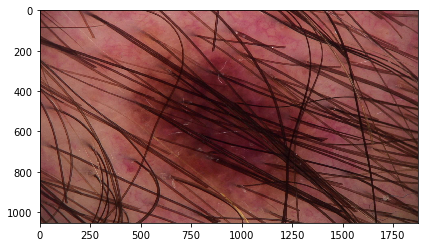

In [5]:
paths = glob('../split/train/not_mel/*.jpg')
image = cv2.imread(paths[2], cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
io.imshow(image);

# Creating Arrays out of Images

In [47]:
for infile in glob.glob("../split/train/mel/*.jpg")[:12]:
    lst = []
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    np_im = np.array(im)
    lst.append(np_im)

# Grayscale

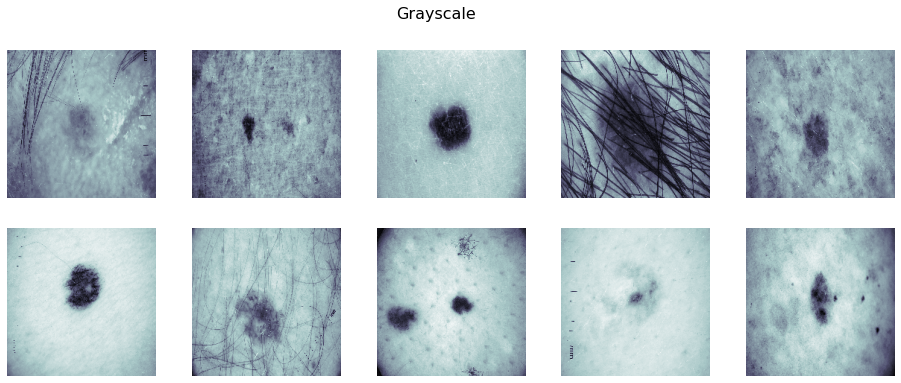

In [14]:
import pydicom
import matplotlib.pyplot as plt

path = "../split/train_dcm"

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 6))
plt.suptitle('Grayscale', fontsize=16)
for i in range(0, 10):
    data = pydicom.read_file(os.path.join(path, df.dcm[i]))
    image = data.pixel_array

    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image, (200,200))

    x = i // 5
    y = i % 5
    axes[x, y].imshow(image, cmap=plt.cm.bone)
    axes[x, y].axis('off')

# Gaussian Blur

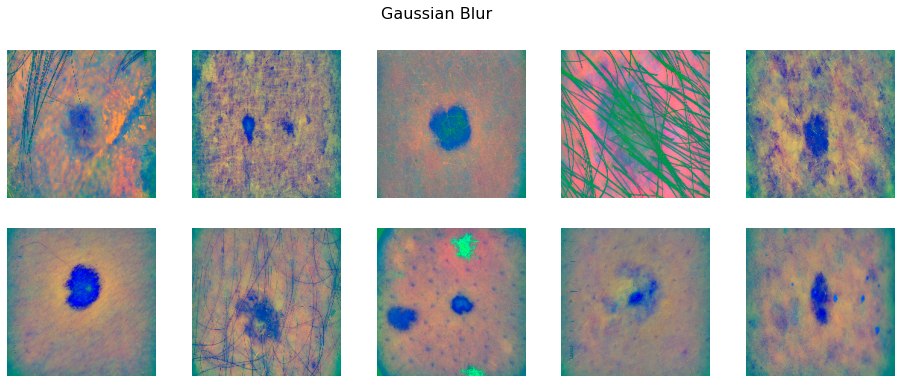

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,6))
plt.suptitle('Gaussian Blur', fontsize=16)
for i in range(0, 10):
    data = pydicom.read_file(os.path.join(path, df.dcm[i]))
    image = data.pixel_array
    image = cv2.resize(image, (200,200))
    image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0, 0), 256/10), -4, 128)

    x = i // 5
    y = i % 5
    axes[x, y].imshow(image, cmap=plt.cm.bone)
    axes[x, y].axis('off')

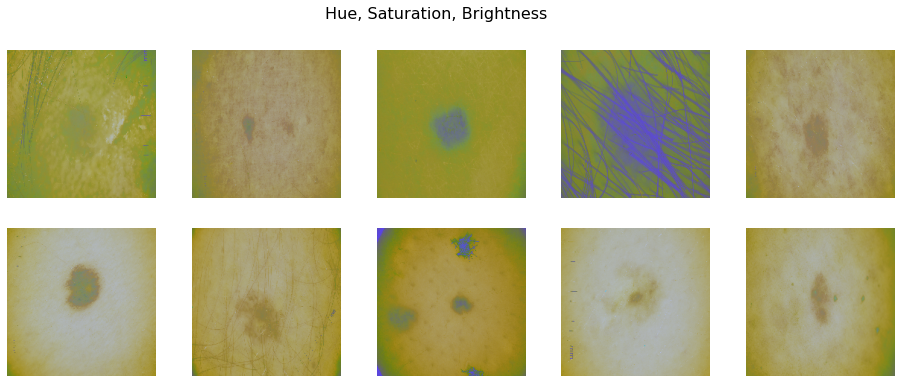

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,6))
plt.suptitle('Hue, Saturation, Brightness', fontsize=16)
for i in range(0, 10):
    data = pydicom.read_file(df['path_dcm'][i])
    image = data.pixel_array
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    image = cv2.resize(image, (200,200))
   
    x = i // 5
    y = i % 5
    axes[x, y].imshow(image, cmap=plt.cm.bone)
    axes[x, y].axis('off')

# LUV Colorspace

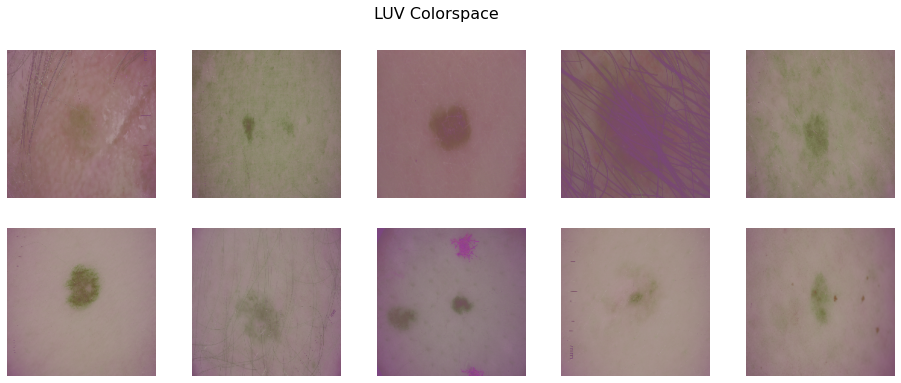

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16,6))
plt.suptitle('LUV Colorspace', fontsize=16)
for i in range(0, 10):
    data = pydicom.read_file(df['path_dcm'][i])
    image = data.pixel_array
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    image = cv2.resize(image, (200,200))
   
    x = i // 5
    y = i % 5
    axes[x, y].imshow(image, cmap=plt.cm.bone)
    axes[x, y].axis('off')

# Segmentation

In [48]:
transform = A.Compose([
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightness(limit=0.2, p=0.75),
    A.RandomContrast(limit=0.2, p=0.75),
    A.OneOf([
        A.MotionBlur(blur_limit=5),
        A.MedianBlur(blur_limit=5),
        A.GaussianBlur(blue_limit=5),
        A.GaussNoise(var_limit(5.0, 30.0)),
    ], p=0.7),
    A.OneOf([
        A.OpticalDistortion(distort_limit=1.0),
        A.GridDistortion(num_steps=5, distort_limit=1.),
        A.ElasticTransform(alpha=3),
    ], p=0.7),
    A.CLAHE(clip_limit=4.0, p=0.7),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
    A.Resize(image_size, image_size),
    A.Cutout(max_h_size=int(image_size*0.375), max_w_size=int(image_size*0.375), num_holes=1, p=0.7),
    A.Normalize()
])


# Edge Detection


# Contrast

# Rotation

# CLAHE

# Rescaling

# Flipping

# Lighting

# PyTorch Transforms

In [ ]:
def hair_remove(image):
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel = cv2.getStructuringElement(1,(17,17))
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)
    return final_image

In [ ]:
hairy_ = df[df["sex"] == 1].reset_index().iloc[[12, 14, 17, 22, 33, 34]]
image_list = hairy['path_jpg']
image_list = image_list.reset_index()['path_jpg']